In [1]:
import os
import platform
from ftplib import FTP
import sys


# For searching and accessing NASA data
import earthaccess

# For reading data, analysis and plotting
import xarray as xr
import hvplot.xarray

import pprint  # For nice printing of python objects

In [2]:
def get_padded_count(count, max_count):
    return str(count).zfill(len(str(max_count)))


def file_byte_handler(data):
    global download_file_obj, read_byte_count, total_byte_count
    download_file_obj.write(data)
    read_byte_count = read_byte_count + len(data)
    progress_bar(read_byte_count, total_byte_count)


def progress_bar(progress, total, prefix="", size=60, file=sys.stdout):
    if total != 0:
        x = int(size * progress / total)
        x_percent = int(100 * progress / total)
        file.write(f" {prefix} [{'='*x}{' '*(size-x)}] {x_percent} % \r")
        file.flush()


def download_files(user_email, esa_files):
    global download_file_obj, read_byte_count, total_byte_count
    print("About to connect to ESA science server")
    with FTP("science-pds.cryosat.esa.int") as ftp:
        try:
            ftp.login("anonymous", user_email)
            print("Downloading {} files".format(len(esa_files)))

            for i, filename in enumerate(esa_files):
                padded_count = get_padded_count(i + 1, len(esa_files))
                print("{}/{}. Downloading file {}".format(padded_count, len(esa_files), os.path.basename(filename)))

                with open(os.path.basename(filename), 'wb') as download_file:
                    download_file_obj = download_file
                    total_byte_count = ftp.size(filename)
                    read_byte_count = 0
                    ftp.retrbinary('RETR ' + filename, file_byte_handler, 1024)
                print("\n")
        finally:
            print("Exiting FTP.")
            ftp.quit()

In [3]:
user_email = 'mikala.beig@colorado.edu'

In [6]:
esa_files = ['SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T035333_20220118T035805_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220128T133919_20220128T134443_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220119T030002_20220119T030653_E001.nc', 'SIR_SAR_L2/2022/02/CS_OFFL_SIR_SAR_2__20220202T124520_20220202T125222_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T053036_20220118T054012_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T021149_20220118T021807_E001.nc', 'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220123T111540_20220123T112122_E001.nc', 'SIR_SIN_L2/2022/02/CS_OFFL_SIR_SIN_2__20220204T025158_20220204T025637_E001.nc']

In [7]:
len(esa_files)

9

In [8]:
download_files(user_email, esa_files)

About to connect to ESA science server
1/9. Downloading file CS_OFFL_SIR_SAR_2__20220118T035333_20220118T035805_E001.nc
  [============================================================] 100 % 

2/9. Downloading file CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc
  [============================================================] 100 % 

3/9. Downloading file CS_OFFL_SIR_SAR_2__20220128T133919_20220128T134443_E001.nc
  [============================================================] 100 % 

4/9. Downloading file CS_OFFL_SIR_SAR_2__20220119T030002_20220119T030653_E001.nc
  [============================================================] 100 % 

5/9. Downloading file CS_OFFL_SIR_SAR_2__20220202T124520_20220202T125222_E001.nc
  [============================================================] 100 % 

6/9. Downloading file CS_OFFL_SIR_SAR_2__20220118T053036_20220118T054012_E001.nc
  [============================================================] 100 % 

7/9. Downloading file CS_OFFL_SIR_SAR

In [7]:
import matplotlib.pyplot as plt
from scipy.io import netcdf

from cartopy import config
import cartopy.crs as ccrs

from netCDF4 import Dataset as NetCDFFile

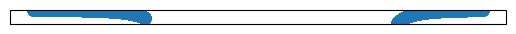

In [12]:

# get the path of the file. It can be found in the repo data directory.
#fname = './CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc'

#dataset = netcdf.netcdf_file(fname, maskandscale=True, mmap=False)
#freeboard = dataset.variables['radar_freeboard_20_ku'][0, :, :]
#lats = dataset.variables['lat_poca_20_ku'][:]
#lons = dataset.variables['lon_poca_20_ku'][:]
nc = NetCDFFile('./CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc') 
lat = nc.variables['lat_poca_20_ku'][:]
lon = nc.variables['lon_poca_20_ku'][:]
freeboard = nc.variables['radar_freeboard_20_ku'][:]

ax = plt.axes(projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=70, scale_factor=None, globe=None))

plt.scatter(lon, lat, 60,
             transform=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=70, scale_factor=None, globe=None))

ax.coastlines()

plt.show()